In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
f = open('data.txt','r')
n = int(f.readline())
X = np.zeros(n)
Y = np.zeros(n)
flag = np.zeros((n+5,n+5))
A = np.zeros((n+5,n+5))
for i in range(n):
    st = f.readline()
    string = st.split()
    X[i] = float(string[0])
    Y[i] = float(string[1])
print(X,Y)

[2. 3. 4.] [1.4142 1.7321 2.    ]


In [21]:
def divided_diff(i,j,X,Y):
    if flag[i][j]==1:
        return A[i][j]
    if i==j:
        flag[i][j] = 1
        A[i][j] = Y[i]
        return A[i][j]
    A[i][j] = (divided_diff(i+1,j,X,Y)-divided_diff(i,j-1,X,Y))/(X[j]-X[i])
    flag[i][j] = 1
    return A[i][j]

In [22]:
def newton(X,Y,n,inputx):
    outputy = 0
    for i in range(n):
        temp=divided_diff(0,i,X,Y)
        mul=1
        for j in range(i):
            mul *= (inputx-X[j])
        temp *= mul
        outputy += temp
    return outputy
        

In [23]:
mn = min(X)
mx = max(X)
size = int((mx-mn+6)/0.2)
inval = np.zeros(size)
outval = np.zeros(size)

In [24]:
st = mn-3
for i in range(size):
    inval[i] = st
    outval[i] = newton(X,Y,n,st)
    st += 0.2

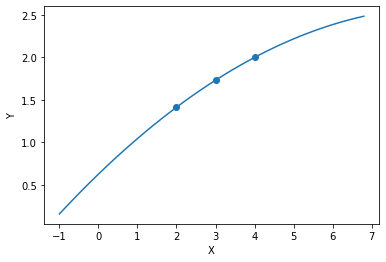

In [25]:
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(inval,outval)
plt.scatter(X,Y)
plt.show()